1. CLEAN DATA from SPOTIFY

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#merge 6 datasets

# get dataset from https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks


df60 = pd.read_csv('Spotify Data/dataset-of-60s.csv')
df70 = pd.read_csv('Spotify Data/dataset-of-70s.csv')
df80 = pd.read_csv('Spotify Data/dataset-of-80s.csv')
df90 = pd.read_csv('Spotify Data/dataset-of-90s.csv')
df00 = pd.read_csv('Spotify Data/dataset-of-00s.csv')
df10 = pd.read_csv('Spotify Data/dataset-of-10s.csv')

#merge combined.csv and adapt column names to match the other datasets
#df20 = pd.read_csv('combined.csv')
#df20.rename(columns={'Unnamed: 0': 'track_id', 'artists': 'artist', 'name': 'track', 'release_date': 'year'}, inplace=True)





#merge 6 datasets so we have a dataset ordered according to the decades and export it as csv
df = pd.concat([df60, df70, df80, df90, df00, df10])
df.to_csv('Spotify Data/decaded-combined.csv', index=False)


print(df.shape)
# print(df.tail(5))
df.info()
# print(df.shape)
#df.drop(['uri', 'track', 'artist'], axis=1, inplace=True) --> TO BE DECIDE


(41106, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-n

In [51]:
#drop duplicates and null values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(df.shape)

df.head(2)

(40686, 19)


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107,0.1760,0.797,101.801,213613,4,48.82510,10,0


0    20553
1    20133
Name: target, dtype: int64


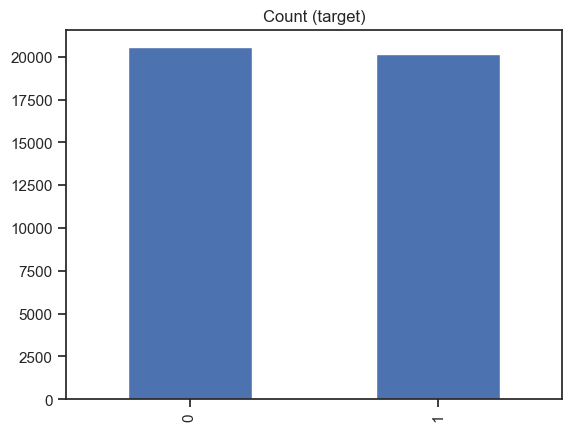

In [52]:
# count values of target variable called target of df
print(df['target'].value_counts())

# histogram of target variable
df['target'].value_counts().plot(kind='bar', title='Count (target)');
plt.show()


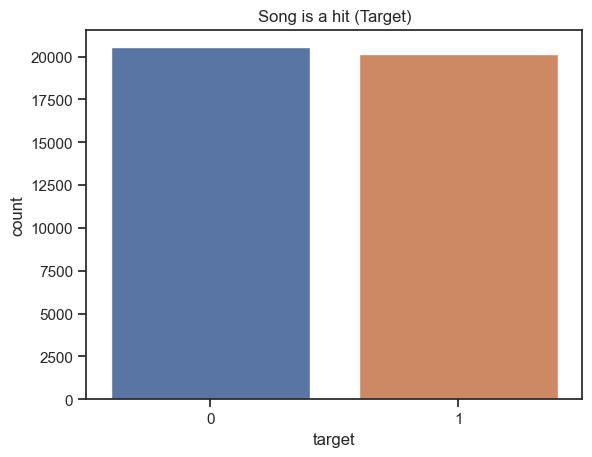

In [53]:
sns.countplot(x='target',data=df)
plt.title('Song is a hit (Target)')
plt.show()

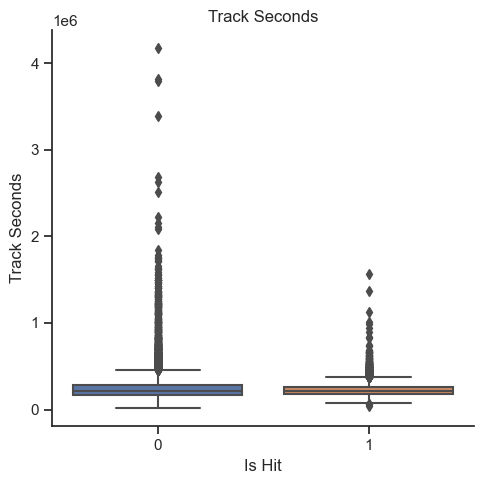

In [54]:
sns.color_palette("light:b", as_cmap=True)
sns.catplot(data=df,x='target',y='duration_ms',kind='box')
plt.title('Track Seconds')
plt.xlabel('Is Hit')
plt.ylabel('Track Seconds')
plt.tight_layout()
plt.show()

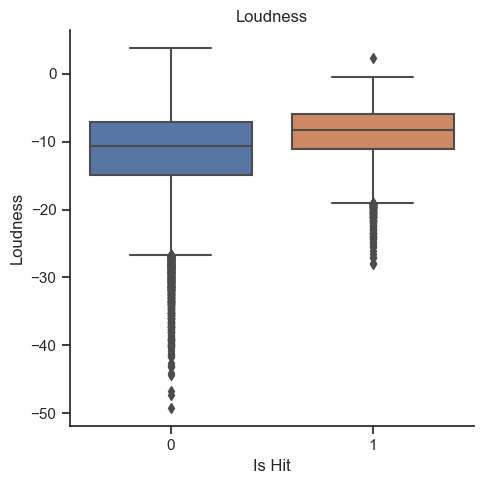

In [55]:
sns.color_palette("light:b", as_cmap=True)
sns.catplot(data=df,x='target',y='loudness',kind='box')
plt.title('Loudness')
plt.xlabel('Is Hit')
plt.ylabel('Loudness')
plt.tight_layout()
plt.show()

# DO THIS FOR ALL COLUMN NAMES --> TO BE DECIDE --> SOPHIE? --> exploratory data analysis

# then correlation matrix for each decade and each features

# do spider charts for each decade and each feature
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(df, hue="target")
#plt.show()



In [56]:
feathits=pd.DataFrame()

#df with only target value == 1
feathits = df.loc[df['target'] == 1]
feathits = feathits[['acousticness',   'instrumentalness', 'tempo', 'speechiness', 'valence','energy','liveness','danceability','loudness', 'duration_ms']]# ,'track_seconds','loudness']]
feathits['loudness'] = abs(feathits['loudness'])


featnonhits=pd.DataFrame()
featnonhits = df.loc[df['target'] == 0]
featnonhits = featnonhits[['acousticness',   'instrumentalness', 'tempo', 'speechiness', 'valence','energy','liveness','danceability','duration_ms', 'loudness']]# ,'track_seconds','loudness']]
featnonhits['loudness'] = abs(featnonhits['loudness'])

# convert duration_ms into seconds
feathits['duration_ms'] = feathits['duration_ms']/1000
featnonhits['duration_ms'] = featnonhits['duration_ms']/1000

#scale duration_ms to 0-1 value
feathits['duration_ms'] = feathits['duration_ms']/feathits['duration_ms'].max()
featnonhits['duration_ms'] = featnonhits['duration_ms']/featnonhits['duration_ms'].max()


# convert loudness into positive values
feathits['loudness'] = abs(feathits['loudness'])
featnonhits['loudness'] = abs(featnonhits['loudness'])

# scale loudness to 0-1 value
feathits['loudness'] = feathits['loudness']/feathits['loudness'].max()
featnonhits['loudness'] = featnonhits['loudness']/featnonhits['loudness'].max()

# scale tempo to 0-1 value
feathits['tempo'] = feathits['tempo']/feathits['tempo'].max()
featnonhits['tempo'] = featnonhits['tempo']/featnonhits['tempo'].max()

feathits.describe

<bound method NDFrame.describe of       acousticness  instrumentalness     tempo  speechiness  valence  energy  \
0           0.4900          0.000000  0.770324       0.0403    0.845   0.620   
7           0.7950          0.000000  0.497903       0.0473    0.887   0.624   
9           0.0385          0.000002  0.532495       0.0280    0.685   0.603   
11          0.7860          0.001200  0.499110       0.0315    0.350   0.411   
13          0.5430          0.000000  0.390127       0.1460    0.840   0.666   
...            ...               ...       ...          ...      ...     ...   
6390        0.0189          0.000000  0.498376       0.0489    0.447   0.632   
6391        0.0495          0.017700  0.514724       0.0336    0.398   0.807   
6392        0.0447          0.000000  0.352779       0.1860    0.430   0.784   
6394        0.0996          0.000000  0.497844       0.0941    0.740   0.366   
6395        0.0132          0.000003  0.497903       0.0355    0.605   0.804   

     

/var/folders/3h/r2hbd12s1r9ccvfmt_h9r3pm0000gn/T/ipykernel_1313/2150214264.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.cm.get_cmap("Set2", len(feathits.index))


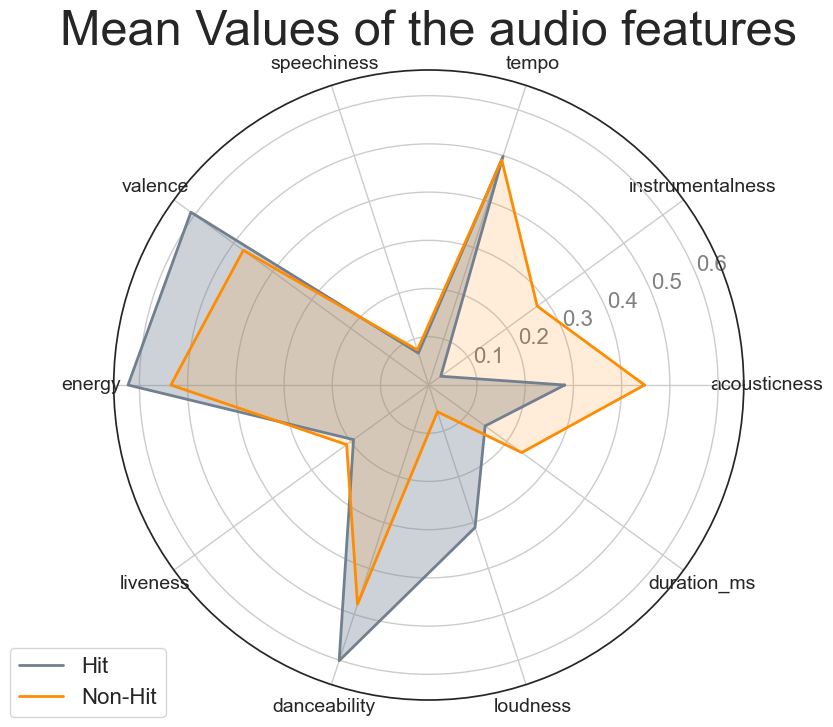

In [57]:
#STILL HAVE TO ADD DURATION_MS AND LOUDNESS

import math 


# plot size
#fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(feathits.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value = list(feathits.mean())
value2 = list(featnonhits.mean())

# # tempo - scaled
# value[2] = value[2]/220
# value2[2] = value2[2]/220

# # #scale loudness from value and value2
# # value[9] = value[9]/25
# # value2[9] = value2[9]/25

# #scale duration_ms from value and value2
# value[8] = value[8]/40000
# value2[8] = value2[8]/40000


# #speech - scaled
# value[3] = value[3]*1.5
# value2[3] = value2[3]*1.5

# # inst - scaled
# value[1] = value[1]*1.5
# value2[1] = value2[1]*1.5

# # loudness - scaled
# value[8] = value[8]/25
# value2[8] = value2[8]/25


# # # time - scaled --> to be scaled
# value[9] = value[9]/4000
# value2[9] = value2[9]/4000


# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
value2+=value2[:1]

# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)

#plot 1 hits
ax.plot(angles, value,  linewidth=2, label = "Hit", color= 'slategray')
ax.fill(angles, value, alpha=0.35, facecolor='slategray')

#plot 2 non-hits
ax.plot(angles, value2, linewidth=2, label = "Non-Hit", color = 'darkorange')
ax.fill(angles, value2, alpha=0.15, facecolor='darkorange' )
#ax.set_title('Mean Values of the audio features')
ax.grid(True)

# plt.polar(angles, value,label='hit')
# plt.fill(angles,value,alpha=0.3)

# plt.polar(angles, value2,label='non-hit',color='m')
# plt.fill(angles,value2,alpha=0.3,facecolor='m')

# plt.title('Discovery Weekly Songs Audio Features', size=35)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1),fontsize=16)
# Title 
plt.title('Mean Values of the audio features', size=35)

plt.xticks(angles[:-1],categories, size=14)
plt.yticks(color='grey',size=16)

# Create a color palette:
plt.cm.get_cmap("Set2", len(feathits.index))
plt.show()

#save as png
fig.savefig('mean-features-hits.png')

In [58]:
# define key_mapping dictionary
key_mapping = {
    0: 'C',
    1: 'C# / Db',
    2: 'D',
    3: 'D# / Eb',
    4: 'E',
    5: 'F',
    6: 'F# / Gb',
    7: 'G',
    8: 'G# / Ab',
    9: 'A',
    10: 'A# / Bb',
    11: 'B'
}

# use dictionary to replace numerical values with string values
df['key'] = df['key'].replace(key_mapping)


In [59]:
# define mode_mapping dictionary
mode_mapping = {0: 'minor', 1: 'major'}

# use dictionary to replace numerical values with string values
df['mode'] = df['mode'].replace(mode_mapping)


# Formatting spotify 


df['uri'] = df['uri'].str.replace('spotify:track:', '')

# Umbenenen der Splate uri in track_id
df.rename(columns={'uri': 'track_id'}, inplace=True)


# save df as csv
df.to_csv('Spotify Data/data-clean.csv', index=False)